<img src = 'https://drive.google.com/uc?id=1cPtoRUIVZ2jWaiIl8z1fm4R4V3kwQfZh
' width="170" height="190" align = "left">

# <font color = "darkgreen" > <b>Obiective</b></font>

---

Prin parcurgerea acestui capitol veți învăța despre:

- manipularea imaginilor în `Python` folosind librăria `PIL`(`Python Image Library`)
- formatele de imagine `RGB, GRAY, BINARY`
- filtre folosite pentru îmbunătățirea calității imaginilor


# Imaginile în Python


## Ce este o imagine?


O imagine este o reprezentare vizuală a unui obiect fizic, obținută cu ajutorul unui dispozitiv de fotografiere (aparat foto, cameră, telefon, etc).

Atunci când sunt copiate sau stocate în memoria unui calculator, imaginile sunt reprezentare ca tablouri multi-dimensionale.

Pot avea diferite formate, în funcție de algoritmul folosit pentru codificare sau pentru compresie ('`JPG`', '`PNG`', '`SVG`', etc.)
![img](https://drive.google.com/uc?export=view&id=12mjfCnobk4c9gsURh7aNdLLgPBKVOVCt)


Vom folosi `PIL` (`Python Image Library`) pentru a putea lucra cu imagini. `PIL` conține multe funcții utile în prelucrarea imaginilor.


## Citirea / Scrierea / Afișarea imaginilor


Vom folosi o imagine stocată pe mașina virtuală. Pentru început, încărcați imaginea 'peppers.png' din [resources](https://drive.google.com/drive/folders/1M9otFTE7NsY-zBa9CCOTnZLuXF3a9qEj?usp=sharing) în folderul 'content'


In [32]:
from PIL import Image
import matplotlib.pyplot as plt

In [33]:
im = Image.open(r"..\data\peppers.png")

Vom verifica dimensiunea imaginii:


In [34]:
# Let's see the size of im
im.size

(512, 512)

Afișăm modul de codificare a imaginii:


In [35]:
# Encoding
im.mode

'RGB'

Afișăm formatul imaginii:


In [36]:
# Format
im.format

'PNG'

Imaginea încărcată este o imagine `RGB`, de dimensiune `512 x 512`, cu format `PNG`. numărul de coloane este primul afișat, apoi numărul de linii (diferit de forma unui tablou multi-dimensional). Nu vom intra însă în amănunte legat de acest aspect în acest curs.


Vom afișa imaginea, folosind alte funcții din biblioteca `matplolib`


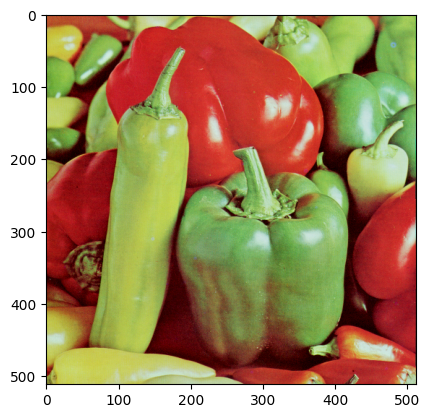

In [37]:
# Let's display it. It should be similar to the top image.
plt.imshow(im)
plt.show()

Pentru slvarea unei imagini în mașina virtuală:


In [38]:
# Writing an image
# im.save("/content/test.png")
# Download the image from the virtual machine and check that it is the same
# as the original one.

## Formate de imagine: `RGB, GRAY, BINARY`


### `RGB`

Imaginile sunt formate din pixeli ('_picture elements_'). Pixelul este cea mai mică unitate de măsură a unei imagini digitale care poate fi afișată și reprezentată pe un dispozitiv digital (ecran).

Imaginile pot avea moduri diferite de reprezentare. În modul `RGB`, cel mai des întâlnit, fiecare pixel este codificat prin 3 culori: roșu, (**R**ed), verde (**G**reen), albastru (**B**lue), fiecare culoarea având o valoare din intervalul [0, 255]

- [0, 0, 0] negru (black)
- [255, 255, 255] alb (white)
- [255, 0, 0] roșu (red)
- [0, 255, 0] verde (green)
- [0, 0, 255] albastru (blue).

Pentru a obține diferite culori, nu trebuie decât să modificăm aceste valori:

![rgb](https://drive.google.com/uc?export=view&id=1YCnaj2thYoVvShY3osMOEqaeHqOOqnY9)


Orice imagine RGB poate fi descompusă în planurile sale de culoare.


### `GRAY`

În multe aplicații, se folosesc imagini în tonuri de gri, deoarece ocupă mai puțină memorie și prelucrarea este mai rapidă.

Conversia din `RGB` în tonuri de gri se face prin calculul mediei canalelor de culoare. Vom folosi `numpy` pentru această prelucrare.


In [39]:
import numpy as np

im_gray = np.mean(im, axis=-1)

Pentru afișare corectă, trebuie să specificăm că imaginea este în tonuri de gri, folosind parametrul 'cmap'.


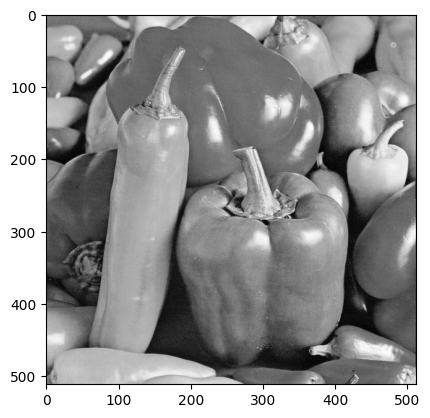

In [40]:
# Display the result. We need to specify that this is a gray-level image.
plt.imshow(im_gray, cmap="gray")
plt.show()

In [41]:
# Check the size of the array
im_gray.shape

(512, 512)

Aparent, imaginea în tonuri de gri pare să aibă aceeași formă (`shape`) ca imaginea inițială, dar nu este așa. Imaginea `GRAY` are un singur plan de culoare, în timp ce imaginea originală `RGB` are 3 planuri de culoare. Acest lucru se poate verifica convertind imaginea `RGB` într-un tablou `numpy`:


In [42]:
# The shape appears to be the same as before.
# But it is not. The gray image has a single colour plane, whereas the original
# image has 3 colour planes, so (512, 512, 3). You can check this by converting
# the image to a numpy array.
np.array(im).shape

(512, 512, 3)

Există și o funcție specială pentru conversie: `rgb2gray`, care folosește o medie ponderată în locul mediei simple.

`0.2989 R + 0.5870 G + 0.1140 B`.

Rezultatul este destul de asemănător.


In [43]:
im_gray2 = im.convert("L")

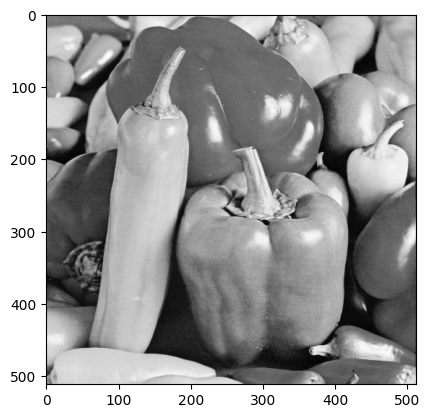

In [44]:
# display the image converted using the library function
plt.imshow(im_gray2, cmap="gray")
plt.show()

Putem implementa propria funcție de conversie folosind `numpy` și `broadcasting`


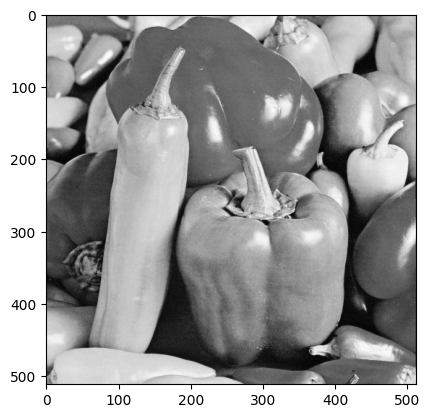

In [45]:
# You can implement the library function yourself using numpy and broadcasting
def rgb2gray(rgb):
    # first convert the image to numpy array
    im_np = np.array(rgb)
    # apply the weighted average using broadcasting
    return np.dot(im_np[..., :3], [0.2989, 0.5870, 0.1140])


im_gray3 = rgb2gray(im)
plt.imshow(im_gray3, cmap="gray")
plt.show()


### `BINARY`


Pentru a ocupa și mai puțină memorie, imaginile pot fi binarizate (transformate în imagini binare).

Alegem un prag și toate valorile care se află sub prag sunt setate ca negru, iar cele care se află peste prag sunt setate ca alb.

Din considerente de afișare, vom atribui valoarea 255 pixelilor albi. O imagine binară reală va conține doar valori `0` și `1`: `0` pentru negru, `1` pentru alb.


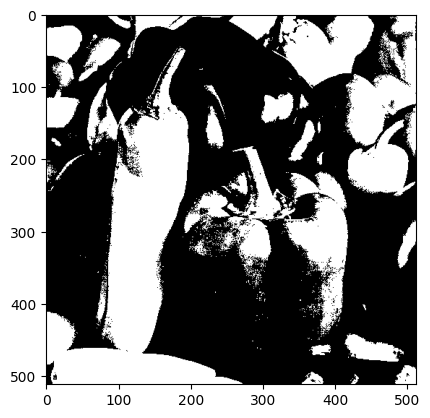

In [46]:
# Define threshold
th = 255 / 2.0
# We create a black image of the same size as the original image
b_im = np.zeros_like(im_gray)
# We use boolean indexing to put values above the threshold to 'white' (1 or 255)
b_im[im_gray > th] = 255
plt.imshow(b_im, cmap="gray")
plt.show()

## Filtre


Operațiile de filtrare pot fi folosite pentru înlăturarea zgomotului dintr-o imagine sau pentru a îmbunătăți anumite caracteristici.

Vom folosi pentru început un filtru foarte simplu - `filtrul median` (the average filter), pentru ca apoi să folosim un filtru mai complex, _filtrul gaussian_.

Valorile acestor filtre vor fi definite manual. În Machine Learning, când se folosesc rețele neuronale - de exemplu în clasificarea imaginilor - rețeaua neuronală învață singură valorile pentru aceste filtre.


### Filtrul median


Definim un filtru median de dimensiune `5 x 5` ca o matrice `5 x 5` cu toate elemntele egale cu `1 / 25`, după cum urmează:
![avg](https://drive.google.com/uc?export=view&id=1S6lfeP_kWEyjpyRWt9O-mAoDnLwDihwT)


Pentru a aplica filtrul de mai sus, vom face următorii pași:

- pentru fiecare pixel, o fereastră de dimensiune `5 x 5` este centrată pe imagine și toți pixelii din interiorul ferestrei sunt însumați, iar apoi rezultatul este împărțit la `25`.
  Pe scurt, calculăm media valorilor pixelilor din interiorul ferestrei și atribuim valoarea rezultată pixelului din centrul ferestrei.
  Această operație este efectuată pentru toți pixelii din imagine pentru a rezulta imaginea filtrată.


Vom implementa algoritmul descris mai sus cu ajutorul instrucțiunilor repetitive (nu este eficient, dar este folositor pentru a înțelege ideea de rezolvare)


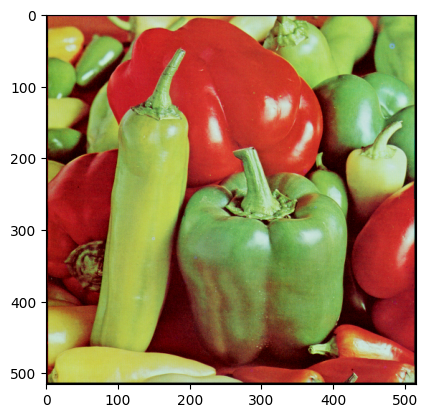

In [47]:
k = 5
im_array = np.array(im)
output_im = np.zeros_like(im_array)
kernel_avg = 1 / (k * k) * np.ones((k, k), dtype=np.float32)
# Get the size of the image
h, w, c = im_array.shape
# Before filtering, note that the pixels on the boundaries need to be
# treated separately, as they don't have neighbour pixels. A possible way to
# deal with this is to pad the image, i.e. add a frame of zeros to the image,
# with width equal half the filter size.
offset = k // 2
pad_im = np.pad(im_array, ((offset, offset), (offset, offset), (0, 0)))
plt.imshow(pad_im)
plt.show()

In [48]:
pad_im.shape

(516, 516, 3)

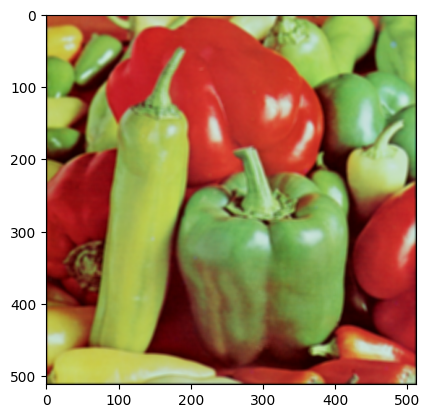

(512, 512, 3)

In [49]:
for i in range(c):  # we filter each channel independently
    for ii in range(offset, h + offset):
        for iii in range(offset, w + offset):
            output_im[ii - offset, iii - offset, i] = np.sum(
                np.multiply(
                    pad_im[
                        ii - offset : ii + offset + 1,
                        iii - offset : iii + offset + 1,
                        i,
                    ],
                    kernel_avg,
                )
            )

plt.imshow(output_im)
plt.show()
output_im.shape

Se observă că imaginea este mai puțin clară după aplicarea operației de filtrare. Se poate exagera efectul prin aplicarea unui filtru de dimensiune mai mare, de exemplu _10 x 10_.


### Filtrare gaussiană


Când folosim filtru median, toți pixelii din fereastră contribuie în mod egal la valoarea finală a pixelului transformat.
În unele situații, am putea dori să atribuim importanța diferențiată pixelilor din fereastră. De exemplu, putem folosi un filtru gaussian (_curbă Gauss_/ _clopot Gauss_). Contribuția fiecărui pixel va scădea exponențial pe măsură ce ne îndepărtăm de pixelul central.


Un filtru Gauss este definit prin media (m), variaţia (s) şi dimensiunea fereastrei (k).

Pentru a obţine un filtru 2D putem considera două filtre Gauss independente 1D.

Presupunem că m=0, s=1, k=5.
Să definim şi să vizualizăm filtrul Gauss 1D.

![gauss](https://drive.google.com/uc?export=view&id=1mKSqLuQWEeb9E5KLlF79zVwFM5IRD5p0)


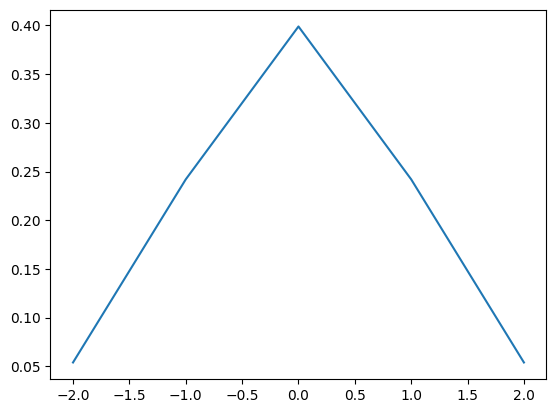

In [50]:
import numpy as np
from numpy import pi, exp, sqrt

s, q = 1, 2  # generate a k x k gaussian kernel, k=2q+1, with mean=0 and sigma = s
probs = [exp(-x * x / (2 * s * s)) / (sqrt(2 * pi) * s) for x in range(-q, q + 1)]
plt.plot(range(-q, q + 1), probs)  # TODO fix the visualisation range

In [51]:
probs

[np.float64(0.05399096651318806),
 np.float64(0.24197072451914337),
 np.float64(0.3989422804014327),
 np.float64(0.24197072451914337),
 np.float64(0.05399096651318806)]

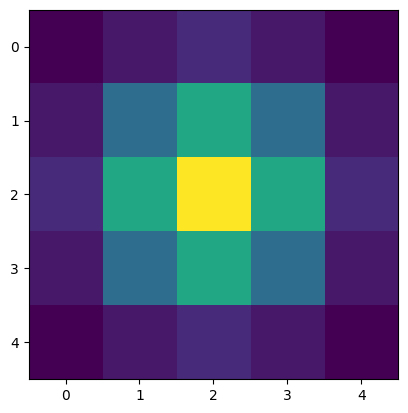

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [52]:
kernel_2d = np.outer(probs, probs)
plt.imshow(kernel_2d)
plt.show()
kernel_2d

Vom aplica imaginii date nucleul definit apelând funcţii din librăria `filter`.

Procesul este echivalent cu ceea ce am efectuat mai sus, dar mult mai eficient.


In [53]:
# create a kernel in PIL format
from PIL import ImageFilter

kernel_2d_pil = ImageFilter.Kernel((5, 5), kernel_2d.flatten())
im_blurred = im.filter(kernel_2d_pil)

❓: Afişaţi imaginea filtrată. Ce se observă?


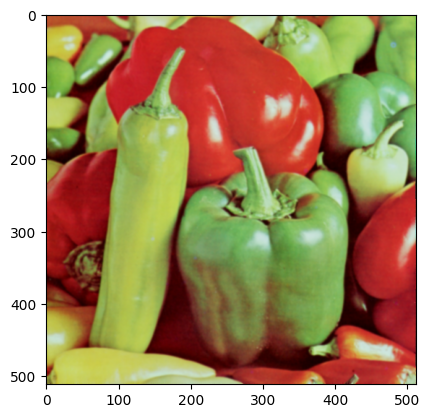

In [54]:
plt.imshow(im_blurred)
plt.show()

❓: Măriţi valoarea lui s, refaceţi operaţia de filtrare şi afişaţi. Ce se observă?


# Bonus: Videoclipuri


Videoclipurile sunt secvenţe de imagini (se mai numesc şi cadre/ frame-uri), deci sunt tablouri 4D.
Există mai multe biblioteci cu funcţii utilizate pentru a citi/ scrie secvenţe video.

Odată ce am încărcat videoclipul în memorie, putem aplica operațiile folosite la imagini, peste cadrele video.


Pentru început vom încărca videoclipul [tennis.mp4](https://drive.google.com/drive/folders/1M9otFTE7NsY-zBa9CCOTnZLuXF3a9qEj?usp=sharing) pe maşina virtuală.
Sfat: alegeţi un videoclip de dimensiune mai mică.


Vom citi vedeoclipul şi vom număra câte frame-uri are. Vom salva primele 10 frame-uri într-o listă, pentru a le putea afişa ca imagini.


In [60]:
import imageio

filename = r"..\data\tennis.mp4"
vid = imageio.get_reader(filename, "ffmpeg")
num_frames = 0
max_frames = 10
frames = []
for image in vid.iter_data():
    if num_frames < max_frames:
        frames.append(image)
    num_frames += 1

print(num_frames)

1673


In [ ]:
# Stack the frames to create a numpy array
frames = np.stack(frames, axis=0)

In [64]:
# Check the shape of the array; we have a 4D array now!
frames.shape

(10, 720, 1280, 3)

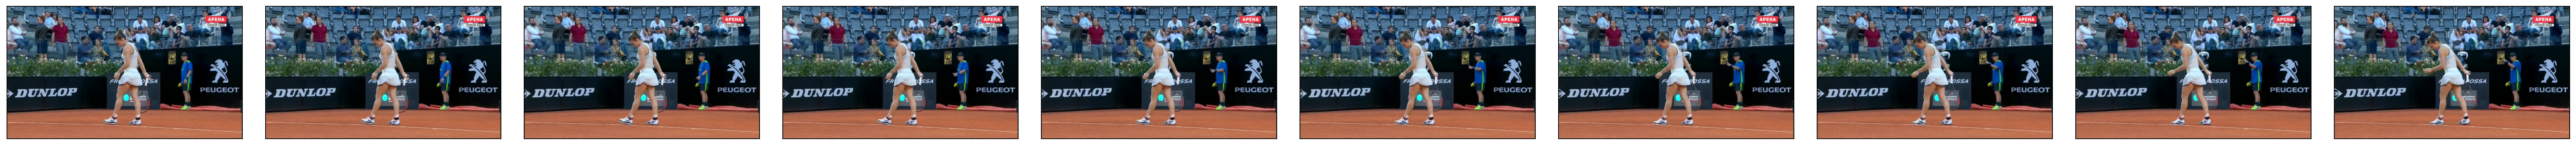

In [ ]:
# Function to display individual frames
def gallery(images, title="Video frames"):
    num_frames, h, w, num_channels = images.shape
    ff, axes = plt.subplots(
        1, num_frames, figsize=(50, 50), subplot_kw={"xticks": [], "yticks": []}
    )
    for i in range(0, num_frames):
        if num_channels == 3:
            axes[i].imshow(np.squeeze(images[i]))
        else:
            axes[i].imshow(np.squeeze(images[i]), cmap="gray")
        plt.setp(axes[i].get_xticklabels(), visible=False)
        plt.setp(axes[i].get_yticklabels(), visible=False)
    ff.subplots_adjust(wspace=0.1)
    plt.show()


gallery(frames)

In [ ]:
# display the video using HTML code
from IPython.display import HTML
from base64 import b64encode

mp4 = open("tennis.mp4", "rb").read()
mp4_vid = b64encode(mp4).decode()
data_url = "data:video/mp4;base64," + mp4_vid
HTML(
    """
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
"""
    % data_url
)

# Concluzii


În această lecţie, am învăţat ce sunt imaginile şi cum să efectuăm prelucrări de bază asupra lor: citire, scriere, afişare, conversie/ transformare, filtrare.
